In [1]:

#==================================================================
#LIBRARY IMPORTS
#==================================================================
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.enable_eager_execution() #Evaluate all operations without building graphs
import pandas as pd
import numpy as np
import numpy.matlib as matlib
import matplotlib.pyplot as plt
import os
import PIL
import math
import glob
import re
import random
import sys
import scipy
import shutil
import time
from IPython import display
from matplotlib.pyplot import figure
from PIL import Image
from scipy import misc
from scipy.io import loadmat
from scipy.io import savemat
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors
from skimage.measure import compare_ssim
from tensorflow import keras
#==================================================================

In [ ]:
#TIF TO GRAYSCALE

#USER PARAMETERS
#==================================================================
dataPath = r'./TIF_TO_CONVERT/' #Set path to where .csv datasets are located
outputPath = r'./PNG_OUTPUT/'#Set path to where images should be exported
startXLen, startYLen = 333, 307 #Specify the image/data starting dimensions; #columns, #rows

#DATA IMPORTATION & VARIABLE SETUP
#==================================================================
print('IMPORTING DATA')
dataFileNames = glob.glob(dataPath + "/*.tif") #Obtain filenames for each set
zLen = len(dataFileNames) #Find total number of files imported
datasets = np.zeros((zLen, startYLen, startXLen)) #Construct structure for data; #set, max(#row, #column), max(#row, #column)
for file in dataFileNames: #For each of the filenames
    dataset = Image.open(file).convert('L') #Read in an image as grayscale
    dataset = dataset.resize([256,256])
    dataset = np.asarray(dataset,dtype=np.float64).reshape((dataset.size[1],dataset.size[0])) #Flatten the image
    datasetXLen, datasetYLen = dataset.shape[1], dataset.shape[0] #Obtain the set's dimensions
    grayImage=Image.fromarray(dataset).convert("L")
    outputName = file
    outputName = outputName[outputName.startswith(dataPath) and len(dataPath):]
    outputName = re.sub('\.tif$', '', outputName)
    grayImage.save(outputPath+outputName+'.png')
print('FINISHED EXPORTING IMAGES')


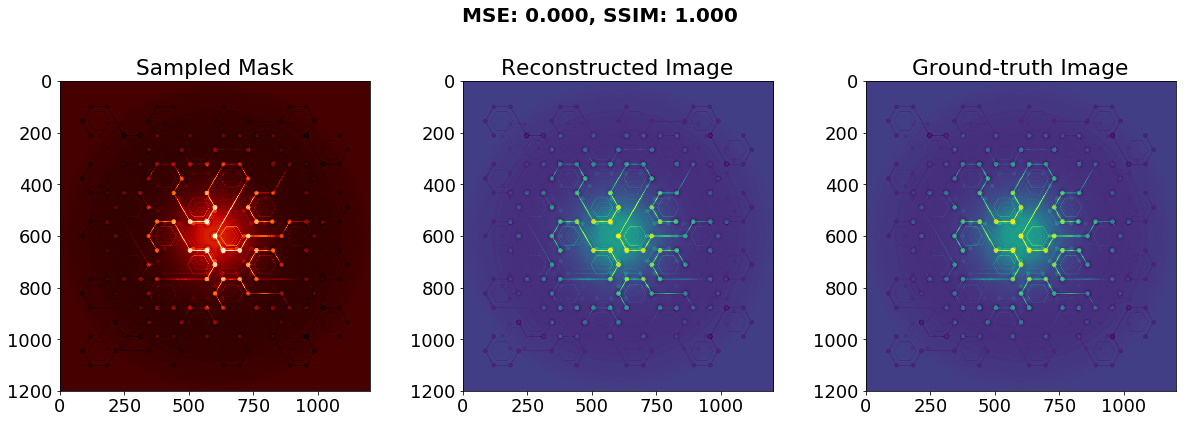

In [92]:
#MATLAB PLOTTING TOOLS

Mask = misc.imread('a.png',flatten = 'True')
ReconImage = misc.imread('a.png',flatten = 'True')
img = misc.imread('a.png',flatten = 'True')

#Moved out plotting code into only function it is used
MSE = (np.sum((ReconImage.astype("float") - img.astype("float")) ** 2))/(float(ReconImage.shape[0] * ReconImage.shape[1]))
SSIM = compare_ssim(ReconImage, img, multichannel=True)

#Set plot formatting
font = {'family' : 'normal', 'size' : 18}
plt.rc('font', **font)


f = plt.figure(figsize=(20,8))

plt.subplots_adjust(wspace = 0.3)
plt.suptitle("MSE: %.3f, SSIM: %.3f" % (MSE, SSIM), fontsize=20, fontweight='bold', y = 0.9)
#plt.figure(figsize=(3, 3))
ax1 = f.add_subplot(131)
ax1.imshow(Mask, cmap='gist_heat')
ax1.set_title('Sampled Mask')
ax2 = f.add_subplot(132)       
ax2.imshow(ReconImage)
ax2.set_title('Reconstructed Image')
ax3 = f.add_subplot(133)
ax3.imshow(img)
ax3.set_title('Ground-truth Image')
plt.savefig('./test' + '.png')


In [ ]:

def gausKern_parhelper(index, a, temp):
    indexVal = temp(index)
    Filter = generateGaussianKernel(sigma[indexVal],WindowSize) #Form a Gaussian filter
    temp[:,index] = ImgAsBlocksOnlyUnmeasured[:,indexVal]*Filter #Calculate an "area" that the c value will capture
    return temp

temp = 
num_threads = multiprocessing.cpu_count() #Determine number of available threads
temp = Parallel(n_jobs=num_threads)(delayed(gausKern_parhelper)(index, a, temp) for index in range(0,len(OrderForRD))) #Perform task in parallel




In [68]:
#==================================================================
#Program: SLADS_TensorFlow_Training
#Author(s): David Helminiak
#Date Created: 13 February 2018
#Date Last Modified: February 2018
#Changelog: 0.1 - Combined Structure            - February 2018
#           0.2 - Combined Train/Test           - February 2018
#           0.3 - Gaussian CPU Multi-Threading  - February 2018
#==================================================================
#==================================================================

#==================================================================
#ADDITIONAL NOTES:
#==================================================================
#Add Breakpoint anywhere in the program: 
#from IPython.core.debugger import Tracer; Tracer()() 
#==================================================================
#==================================================================

#==================================================================
#LIBRARY IMPORTS
#==================================================================
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.enable_eager_execution() #Evaluate all operations without building graphs
import pandas as pd
import numpy as np
import numpy.matlib as matlib
import matplotlib.pyplot as plt
import multiprocessing
import os
import PIL
import math
import glob
import re
import random
import sys
import scipy
import shutil
import time
import warnings
warnings.filterwarnings("ignore")
from IPython import display
from joblib import Parallel, delayed
from matplotlib.pyplot import figure
from PIL import Image
from scipy import misc
from scipy.io import loadmat
from scipy.io import savemat
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors
from skimage.measure import compare_ssim
from tensorflow import keras
#==================================================================

def par_helper(temp, i):
    temp[:,i] = math.sqrt(i ** 2)
    return temp[:, i]


temp = [[1,1,1,1,1],[0, 0, 0, 0, 0]]
temp = Parallel(n_jobs=2)(delayed(par_helper)(temp, i) for i in range(len(temp)))
temp

TypeError: list indices must be integers or slices, not tuple

In [67]:
temp = [[1,1,1,1,1],[0, 0, 0, 0, 0]]
temp

[[1, 1, 1, 1, 1], [0, 0, 0, 0, 0]]

In [73]:
temp[0][1]

1